# Emergency - 911 Calls / Montgomery County, PA

By [Rodrigo Rosales Alvarez](https://www.linkedin.com/in/rodrigorosalesalvarez/)

Analysis of the dataset [Emergency 911 Calls by Montgomery County, PA](https://www.kaggle.com/datasets/mchirico/montcoalert).

### Project Planning
1. Data Gathering
2. Data Cleaning and Data Wrangling
3. Data Analysis
4. Conclusions

### 1. Data Gathering

In [1]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visualizations
import zipfile as zf # zip files

# Control the general style of the plots
sns.set_style('whitegrid') 

In [2]:
# Open the zip file
with zf.ZipFile("911.zip") as z:
    
    # open the csvs files and asign them to a DF
    with z.open('911.csv') as file:
        df = pd.read_csv(file)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
#All unique entries
df.nunique()

lat           25949
lng           25980
desc         663282
zip             204
title           148
timeStamp    640754
twp              68
addr          41292
e                 1
dtype: int64

### 2. Data Cleaning and Data Wrangling

In [4]:
# DATA CLEANING

# Drop non useful Columns
df.drop('e', axis=1, inplace=True)

In [5]:
# DATA WRANGLING

# Transforming the type of the timeStamp column from object date time
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Creating hour, month, day, year, date of the week column form the timeStamp
df['hour'] = df['timeStamp'].apply(lambda z: z.hour)
df['month'] = df['timeStamp'].apply(lambda z: z.month)
df['day_week'] = df['timeStamp'].apply(lambda z: z.dayofweek)
df['year'] = df['timeStamp'].apply(lambda z: z.year)
df['date'] = df['timeStamp'].apply(lambda z: z.date())

# Day_week is an integer from 0-6. Transforming to a string for visualization purposes
df['day_week'] = df['day_week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

#Separating the title column into type and title
df['class'] = df['title'].apply(lambda x: x.split(':')[0])
df['title'] = df['title'].apply(lambda x: x.split(':')[1])

#Deleting - and afterspacing
df['title'].replace('-', ' ', regex=True, inplace=True)
df['title'] = df['title'].str.strip()

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,hour,month,day_week,year,date,class
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,12,Thursday,2015,2015-12-10,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,12,Thursday,2015,2015-12-10,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,12,Thursday,2015,2015-12-10,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,12,Thursday,2015,2015-12-10,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,12,Thursday,2015,2015-12-10,EMS


### 3. Data Analysis

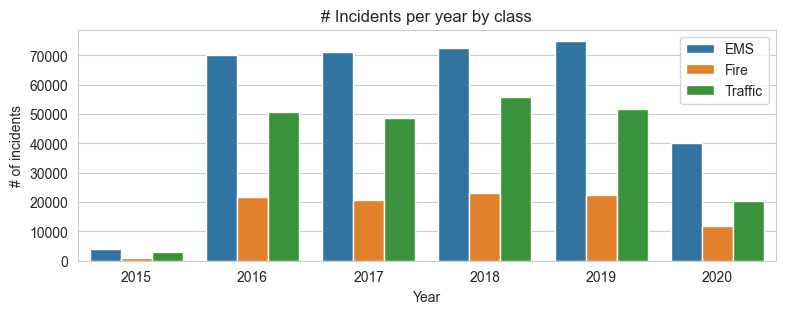

In [7]:
# Number of cases by year by type
plt.figure(figsize=(9,3))
sns.countplot(x='year', data=df, hue='class')
plt.legend(loc=0)
plt.title('# Incidents per year by class')
plt.xlabel('Year')
plt.ylabel('# of incidents')
plt.show()

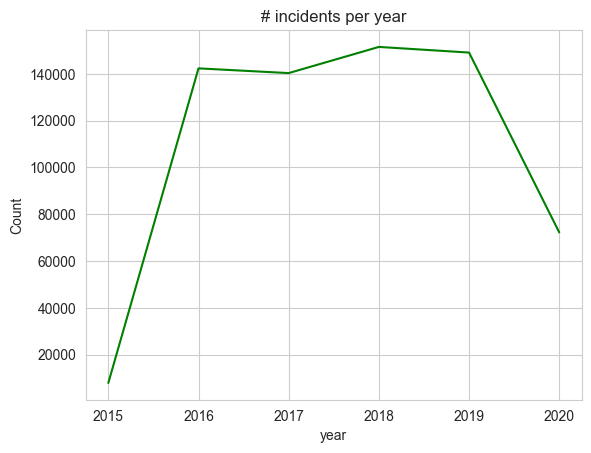

In [8]:
# Number of cases by year
g_year = df.groupby('year').count()
g_year['class'].plot(color='green')
plt.title("# incidents per year")
plt.ylabel('Count')
plt.show()

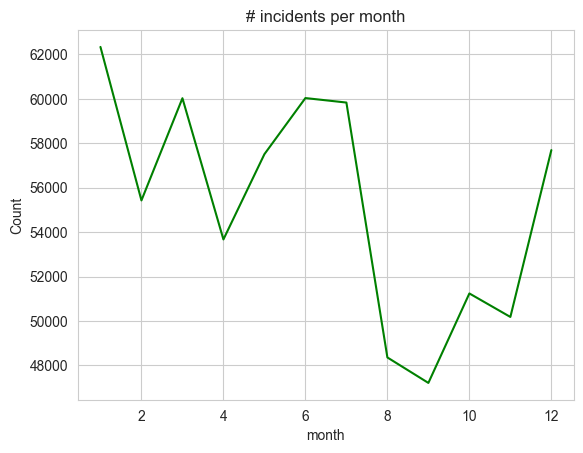

In [9]:
# Number of cases by month
g_month = df.groupby('month').count()
g_month['class'].plot(color='green')
plt.title("# incidents per month")
plt.ylabel('Count')
plt.show()

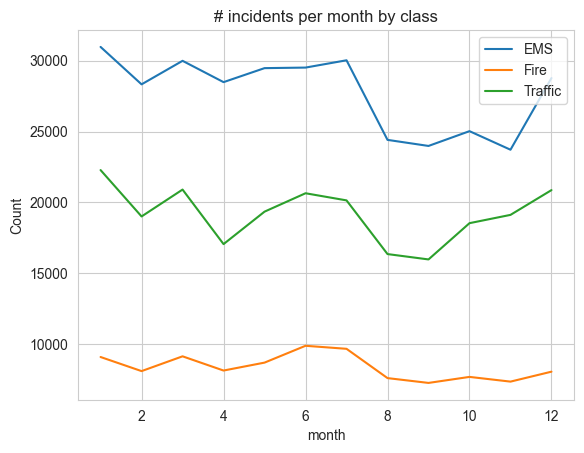

In [10]:
# Number incidents per month by class
g_month_class = df.groupby(['month', 'class']).count().reset_index()
sns.lineplot(data=g_month_class, x="month", y="year", hue="class")
plt.title("# incidents per month by class")
plt.ylabel('Count')
plt.legend(loc=0)
plt.show()

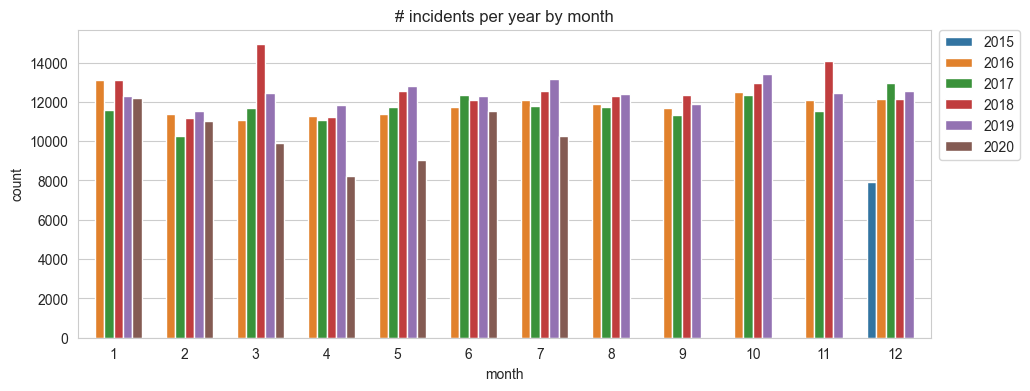

In [11]:
# Number cases of each month by year
plt.figure(figsize=(11,4))
sns.countplot(data= df, x= "month", hue= "year")
plt.title("# incidents per year by month")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

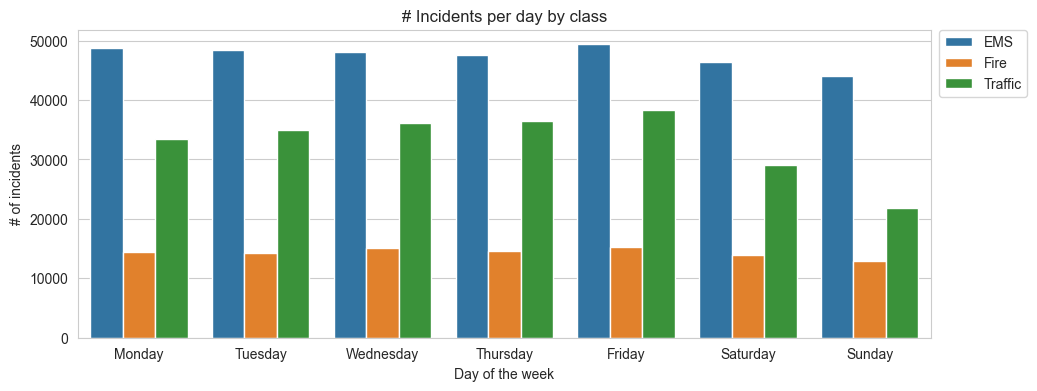

In [12]:
# Number of Incidents per day by class
plt.figure(figsize=(11,4))
sns.countplot(x='day_week', data=df, hue='class', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('# Incidents per day by class')
plt.xlabel('Day of the week')
plt.ylabel('# of incidents')
plt.show()

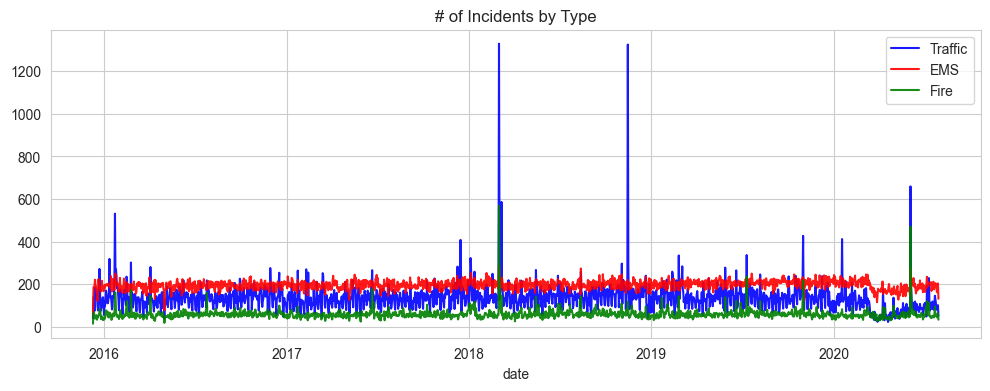

In [13]:
#Plot of each class of incident by date
plt.figure(figsize=(12,4))

df[df['class'] == 'Traffic'].groupby('date').count()['title'].plot(color='blue', alpha=0.9)
df[df['class'] == 'EMS'].groupby('date').count()['title'].plot(color='red', alpha=0.9)
df[df['class'] == 'Fire'].groupby('date').count()['title'].plot(color='green', alpha=0.9)
plt.title('# of Incidents by Type')
plt.legend(('Traffic', 'EMS', 'Fire'), loc=0)
plt.show()

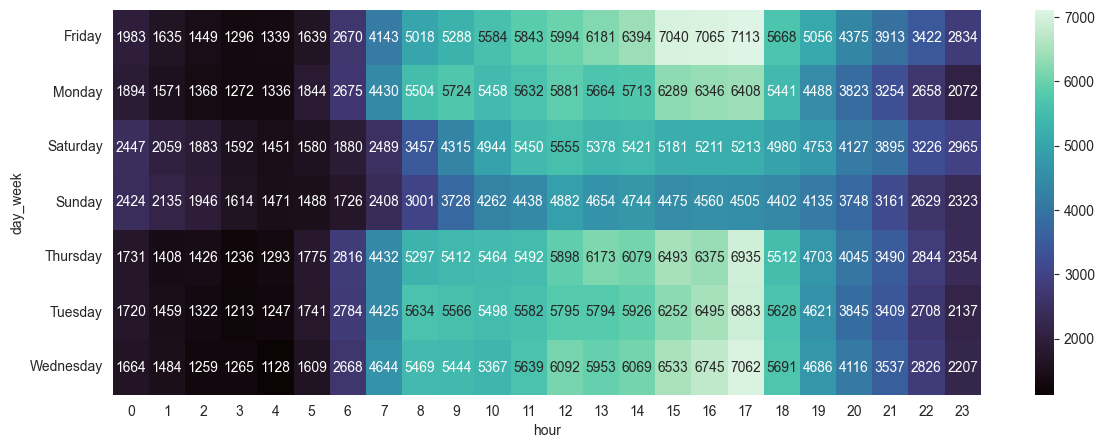

In [14]:
# Heatmap of the incidents by hour and by day
day_hour = df.groupby(by=['day_week','hour']).count()['title']
plt.figure(figsize=(14,5))
sns.heatmap(day_hour.unstack(), cmap='mako', annot=True, fmt='d')
plt.show()

### 4. Conslusions

After analyzing the data, the number of EMS Incidents is higher than the other two classes, in second place Traffic and lastly Fire. 

The year with highest number of incidents is 2018 with 151,527 of all 3 categories, following this year is 2019.

More incidents occurred during the evening, more specifically from 15:00 to 17:00. 

Incidents are well distributed throughout the week, there is not a day in which accidents are more frequent, the same goes for the number of accidents throughout the month. 